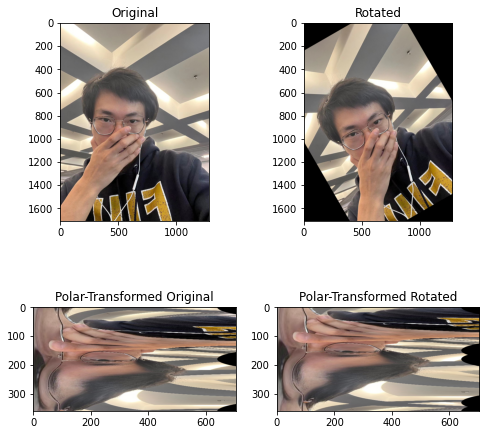

Expected value for counterclockwise rotation in degrees: 30
Recovered value for counterclockwise rotation: 30.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io
from skimage.registration import phase_cross_correlation
from skimage.transform import warp_polar, rotate, rescale
from skimage.util import img_as_float
from skimage.color import rgb2gray
from skimage.filters import window, difference_of_gaussians
from scipy.fft import fft2, fftshift
import os



radius = 705
angle = 30

cwd = os.getcwd()
selfie_filename = os.path.join(cwd,"myself.jpg")
# image = data.retina()
image = io.imread(selfie_filename)

image = img_as_float(image)
rotated = rotate(image, angle)
image_polar = warp_polar(image, radius=radius, channel_axis=-1)
rotated_polar = warp_polar(rotated, radius=radius, channel_axis=-1)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original")
ax[0].imshow(image)
ax[1].set_title("Rotated")
ax[1].imshow(rotated)
ax[2].set_title("Polar-Transformed Original")
ax[2].imshow(image_polar)
ax[3].set_title("Polar-Transformed Rotated")
ax[3].imshow(rotated_polar)
plt.show()

shifts, error, phasediff = phase_cross_correlation(image_polar, rotated_polar)
print(f'Expected value for counterclockwise rotation in degrees: '
      f'{angle}')
print(f'Recovered value for counterclockwise rotation: '
      f'{shifts[0]}')

changing the position of center:

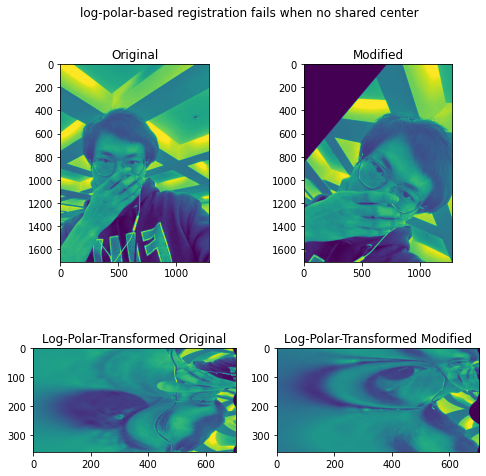

Expected value for cc rotation in degrees: 320
Recovered value for cc rotation: 180.0

Expected value for scaling difference: 1.4
Recovered value for scaling difference: 1.0


In [2]:

angle = 320
#change position of center
scale = 1.4
shiftr = 30
shiftc = 15

#convert 3 channel into 1 channel. decrease the dimension.
# image = data.retina()
image = io.imread(selfie_filename)
image = rgb2gray(image)
translated = image[shiftr:, shiftc:]
rotated = rotate(translated, angle)
rescaled = rescale(rotated, scale)
sizer, sizec = image.shape
rts_image = rescaled[:sizer, :sizec]

radius = 705
warped_image = warp_polar(image, radius=radius, scaling="log")
warped_rts = warp_polar(rts_image, radius=radius, scaling="log")
shifts, error, phasediff = phase_cross_correlation(warped_image, warped_rts,
                                                   upsample_factor=20)
shiftr, shiftc = shifts[:2]
klog = radius / np.log(radius)
shift_scale = 1 / (np.exp(shiftc / klog))



fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original")
ax[0].imshow(image)
ax[1].set_title("Modified")
ax[1].imshow(rts_image)
ax[2].set_title("Log-Polar-Transformed Original")
ax[2].imshow(warped_image)
ax[3].set_title("Log-Polar-Transformed Modified")
ax[3].imshow(warped_rts)
fig.suptitle('log-polar-based registration fails when no shared center')
plt.show()


print(f'Expected value for cc rotation in degrees: {angle}')
print(f'Recovered value for cc rotation: {shiftr}')
print()
print(f'Expected value for scaling difference: {scale}')
print(f'Recovered value for scaling difference: {shift_scale}')
